In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("FONTS.csv")

In [12]:
typeface_columns = [col for col in df.columns if "Typeface Style" in col]
df_filtered = df[["Municipality", "Photo name"] + typeface_columns]
df_melted = df_filtered.melt(id_vars=["Municipality", "Photo name"], value_vars=typeface_columns, 
                             var_name="Typeface Style Column", value_name="Typeface Style Updated")
df_melted = df_melted.dropna()  # Remove empty values
df_melted.head()

,Municipality,Photo name,Typeface Style Column,Typeface Style Updated
0,San Juan Capistrano,San_Juan_odd_39.JPG,Typeface Style (8),Sans Serif
1,Yorba Linda,YorbaLinda138.JPG,Typeface Style (8),Sans Serif
2,San Juan Capistrano,San_Juan_odd_44.JPG,Typeface Style (8),Sans Serif
3,Yorba Linda,YorbaLinda137.JPG,Typeface Style (8),Sans Serif
4,Yorba Linda,YorbaLinda136.JPG,Typeface Style (8),"Serif,Quirky"


In [13]:
df_grouped = df_melted.groupby(["Municipality", "Typeface Style Updated"]).size().reset_index(name="Count")
df_grouped

,Municipality,Typeface Style Updated,Count
0,Costa Mesa,Other,4
1,Costa Mesa,Sans Serif,61
2,Costa Mesa,"Sans Serif,Stylized",1
3,Costa Mesa,Serif,29
4,Costa Mesa,"Serif,Stylized",3
...,...,...,...
128,Aliso Viejo,Slab Serif,1
129,Aliso Viejo,Stylized,3
130,Aliso Viejo,"Stylized,Quirky,Sans Serif",1
131,Aliso Viejo,"Stylized,Sans Serif",1


In [14]:
df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style Updated", values="Count").fillna(0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

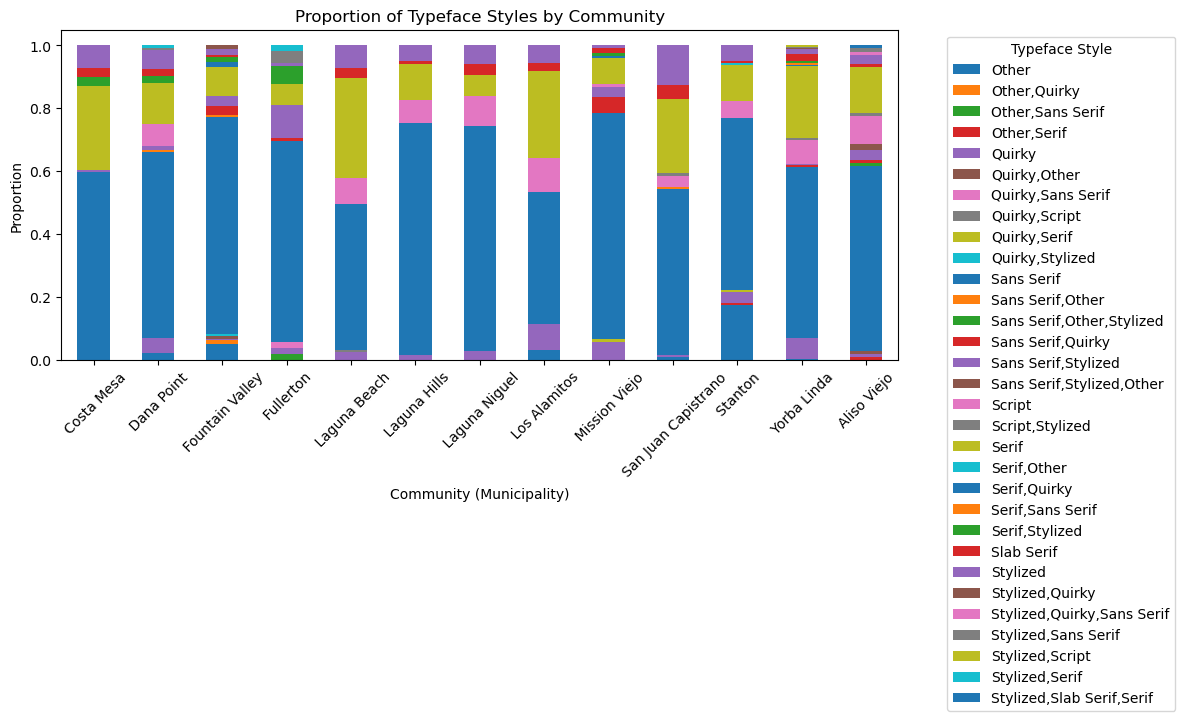

In [16]:
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Typeface Style        Total
Municipality               
 Costa Mesa            82.0
 Dana Point           111.0
 Fountain Valley      113.0
 Fullerton             65.0
 Laguna Beach         143.0
 Laguna Hills         119.0
 Laguna Niguel         84.0
 Los Alamitos         127.0
 Mission Viejo         71.0
 San Juan Capistrano   90.0
 Stanton              152.0
 Yorba Linda          185.0
Aliso Viejo            90.0


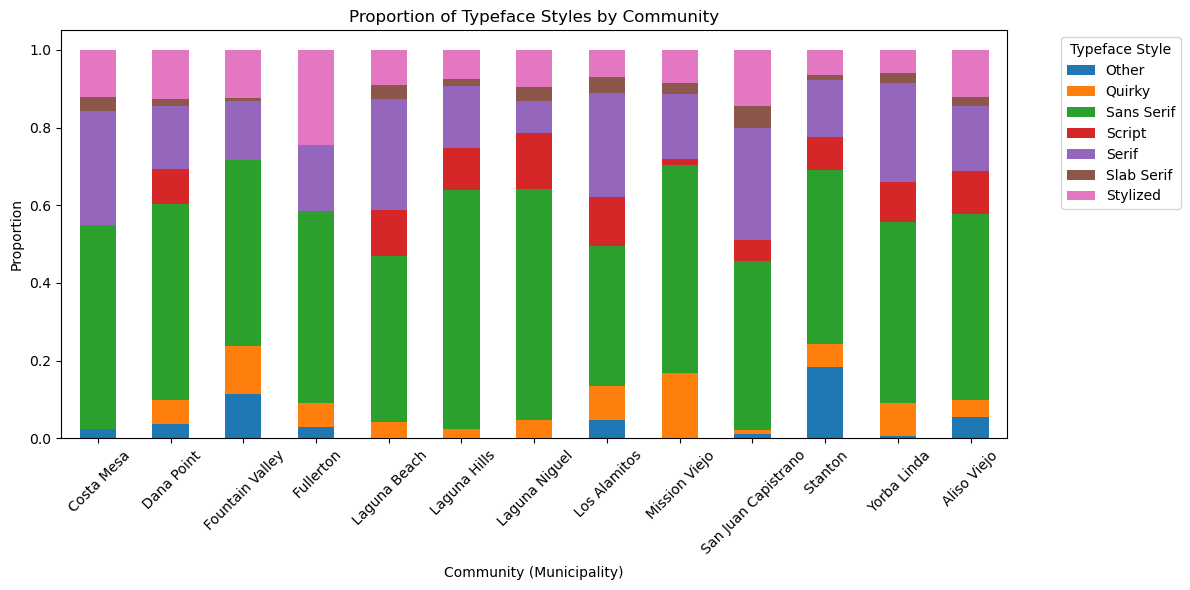

Typeface Style,Other,Quirky,Sans Serif,Script,Serif,Slab Serif,Stylized
Municipality,,,,,,,
Costa Mesa,0.024390,0.000000,0.524390,0.000000,0.292683,0.036585,0.121951
Dana Point,0.036036,0.063063,0.504505,0.090090,0.162162,0.018018,0.126126
Fountain Valley,0.115044,0.123894,0.477876,0.000000,0.150442,0.008850,0.123894
Fullerton,0.030769,0.061538,0.492308,0.000000,0.169231,0.000000,0.246154
Laguna Beach,0.000000,0.041958,0.426573,0.118881,0.286713,0.034965,0.090909


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("FONTS.csv")

# Identify all columns related to "Typeface Style"
typeface_columns = [col for col in df.columns if "Typeface Style" in col]

# Initialize an empty list to store (Municipality, Typeface Style) pairs
records = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    municipality = row["Municipality"]
    # Use a set to avoid duplicate typefaces within the same row
    fonts_set = set()
    
    # Loop over each typeface column
    for col in typeface_columns:
        value = row[col]
        if pd.notna(value):
            # Split the value by comma to get individual fonts,
            # and remove any leading/trailing whitespace
            fonts = [font.strip() for font in str(value).split(',') if font.strip() != ""]
            for font in fonts:
                fonts_set.add(font)
    
    # Add each unique font to the records list with its municipality
    for font in fonts_set:
        records.append({"Municipality": municipality, "Typeface Style": font})

# Create a new DataFrame from the records
df_fonts = pd.DataFrame(records)
# Group by Municipality and Typeface Style to count occurrences
df_grouped = df_fonts.groupby(["Municipality", "Typeface Style"]).size().reset_index(name="Count")
# Pivot the table so that each row represents a municipality and each column a typeface style
df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style", values="Count").fillna(0)
df_pivot["Total"] = df_pivot.sum(axis=1)
print(df_pivot[["Total"]])
del df_pivot["Total"]
# Convert counts to proportions by dividing each row by its sum
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Plot the results as a stacked bar chart
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_pivot.head()

In [71]:
df = pd.read_csv("incomePercentages.csv")

# Step 1: Get the row with city names (first row)
city_row = df.iloc[0]

# Step 2: Keep only the columns labeled "Value" in the second row
value_columns = []
city_names = []

for i, col in enumerate(df.iloc[1]):
    if col == "Value":
        value_columns.append(i)
        city_names.append(city_row[i].split(",")[0])

# Step 3: Extract rows starting from the third row (skip header rows)
df_clean = df.iloc[2:, value_columns]
df_clean.columns = city_names
# Convert percentage strings to float
df_clean = df_clean.applymap(lambda x: float(x.strip('%')) if isinstance(x, str) else pd.nan)
# drops row that contains total percentages (was always 100%)
df_clean = df_clean.iloc[1:].reset_index(drop=True)
df_clean.head()

/var/folders/vf/rpgn1jr93838304d9h79hw300000gn/T/ipykernel_28752/3223730423.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  city_names.append(city_row[i].split(",")[0])
/var/folders/vf/rpgn1jr93838304d9h79hw300000gn/T/ipykernel_28752/3223730423.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: float(x.strip('%')) if isinstance(x, str) else pd.nan)


,Orange County,Aliso Viejo,Anaheim,Brea,Buena Park,Costa Mesa,Coto de Caza,Cypress,Dana Point,Fountain Valley,...,Santa Ana,Seal Beach,Silverado,Stanton,Trabuco Canyon,Tustin,Villa Park,Westminster,Williams Canyon,Yorba Linda
0,4.10,4.08,4.83,3.30,3.21,2.80,2.93,4.02,3.29,4.21,...,3.33,2.71,16.79,5.85,2.88,2.97,2.90,6.29,0.0,3.06
1,2.19,1.02,3.48,1.28,1.69,1.71,0.10,1.18,1.49,2.49,...,2.62,2.13,0.00,3.21,0.00,2.80,2.69,4.33,0.0,1.73
2,1.74,0.76,1.96,1.26,1.58,1.67,0.16,1.08,3.41,1.24,...,2.25,2.87,3.76,2.70,4.87,1.30,1.48,3.65,0.0,0.86
3,2.23,1.34,2.94,2.75,0.88,2.44,1.12,2.43,1.79,2.86,...,2.58,4.05,3.01,4.14,0.00,2.59,0.00,3.99,0.0,2.17
4,2.09,1.85,2.69,0.84,1.91,1.73,0.48,2.46,1.76,2.51,...,2.50,8.09,1.00,2.88,1.33,1.42,1.53,3.53,0.0,0.90


In [76]:
df_clean.index = [
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $19,999',
    '$20,000 to $24,999',
    '$25,000 to $29,999',
    '$30,000 to $34,999',
    '$35,000 to $39,999',
    '$40,000 to $44,999',
    '$45,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

mapping = {
    # “10–45” bin
    'Less than $10,000':     '$10-45k',
    '$10,000 to $14,999':    '$10-45k',
    '$15,000 to $19,999':    '$10-45k',
    '$20,000 to $24,999':    '$10-45k',
    '$25,000 to $29,999':    '$10-45k',
    '$30,000 to $34,999':    '$10-45k',
    '$35,000 to $39,999':    '$10-45k',
    '$40,000 to $44,999':    '$10-45k',

    # “45–100” bin
    '$45,000 to $49,999':    '$45-100k',
    '$50,000 to $59,999':    '$45-100k',
    '$60,000 to $74,999':    '$45-100k',
    '$75,000 to $99,999':    '$45-100k',

    # “100–150” bin
    '$100,000 to $124,999':  '$100-150k',
    '$125,000 to $149,999':  '$100-150k',

    # “150–200” bin
    '$150,000 to $199,999':  '$150-200k',

    # “200+” bin
    '$200,000 or more':      '$200k+'
}

incomes = (
    df_clean
    .rename(index=mapping)  # apply the new 5‐bin labels
    .groupby(level=0)   # group by those 5 labels
    .sum()                  # sum all city columns
)


incomes.head()

,Orange County,Aliso Viejo,Anaheim,Brea,Buena Park,Costa Mesa,Coto de Caza,Cypress,Dana Point,Fountain Valley,...,Santa Ana,Seal Beach,Silverado,Stanton,Trabuco Canyon,Tustin,Villa Park,Westminster,Williams Canyon,Yorba Linda
$10-45k,19.23,13.42,25.02,15.59,15.60,17.68,6.83,16.51,16.46,18.96,...,22.90,30.25,33.83,28.92,10.41,18.24,15.20,31.31,0.00,14.17
$100-150k,19.11,21.46,18.81,18.35,23.78,20.45,9.32,20.83,20.73,19.79,...,21.15,13.06,15.04,19.84,7.30,18.55,14.67,16.99,0.00,18.00
$150-200k,12.73,19.05,10.92,15.77,14.92,13.11,8.88,15.96,12.11,13.90,...,11.07,10.87,14.54,10.86,13.94,11.48,4.96,10.45,0.00,14.53
$200k+,24.10,26.97,15.58,24.66,16.60,21.85,61.28,25.56,30.48,22.21,...,11.97,20.54,16.29,9.37,52.88,24.20,51.19,14.45,45.45,36.13
$45-100k,24.83,19.11,29.64,25.62,29.10,26.92,13.70,21.14,20.22,25.13,...,32.93,25.28,20.30,31.01,15.49,27.52,13.98,26.80,54.55,17.16


In [89]:
#  Costa Mesa            82.0
#  Dana Point           111.0
#  Fountain Valley      113.0
#  Fullerton             65.0
#  Laguna Beach         143.0
#  Laguna Hills         119.0
#  Laguna Niguel         84.0
#  Los Alamitos         127.0
#  Mission Viejo         71.0
#  San Juan Capistrano   90.0
#  Stanton              152.0
#  Yorba Linda          185.0
#  not included: Laguna Niguel 
incomes["Yorba Linda"]

$10-45k      14.17
$100-150k    18.00
$150-200k    14.53
$200k+       36.13
$45-100k     17.16
Name: Yorba Linda, dtype: float64

In [90]:
df = pd.read_csv("FONTS.csv")
for row in df:
    

SyntaxError: invalid syntax (2956266059.py, line 2)